In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny

cryptoTickers = ["BTC-USD", "ETH-USD", "ADA-USD"]
indicesTickers = ["^BVSP", "^NYA", "^IXIC"]


cryptoData = yf.download(cryptoTickers, period="3y")["Adj Close"]
indices = yf.download(indicesTickers, period="3y")["Adj Close"]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


In [3]:
cryptoData = cryptoData.rename(columns={"BTC-USD": "BITCOIN", "ETH-USD": "ETHEREUM", "ADA-USD": "CARDANO"})
indices = indices.rename(columns={"^BVSP": "IBOVESPA", "^IXIC":"NASDAQ Composite", "^NYA":"NYSE Composite"})

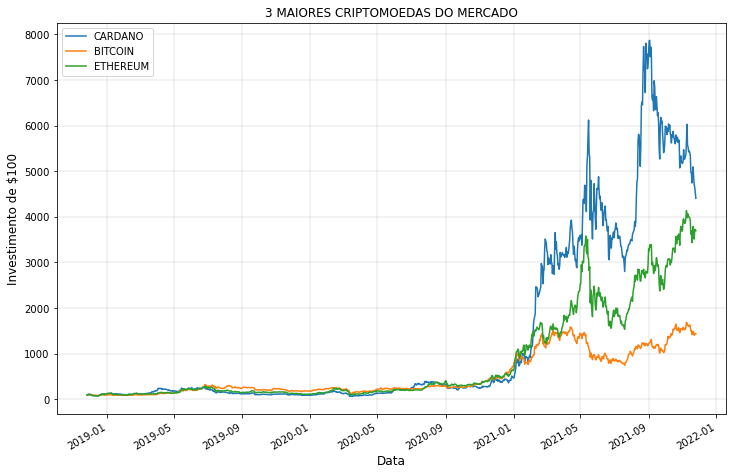

In [21]:
(100 *(cryptoData.pct_change() + 1).cumprod()).plot(figsize=(12,8))
plt.title("3 MAIORES CRIPTOMOEDAS DO MERCADO")
plt.xlabel("Data", fontsize=12)
plt.ylabel("Investimento de $100", fontsize=12)
plt.grid(which="major", color='k', linestyle='-', linewidth=0.1)
plt.savefig("Criptos.png", dpi=1000, transparent=True)

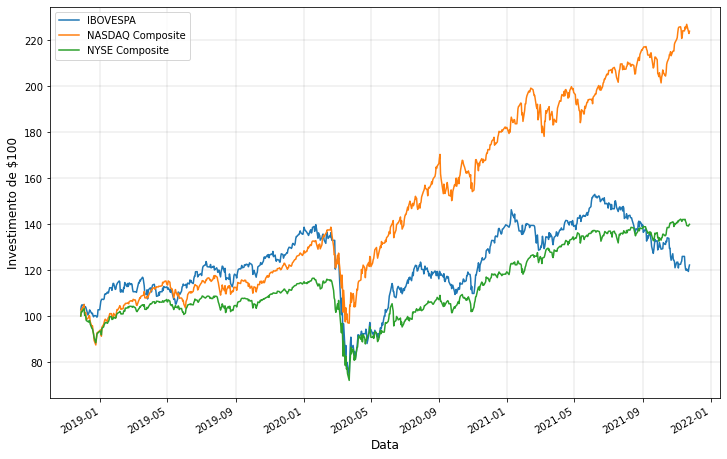

In [20]:
(100 * (indices.pct_change() + 1).cumprod()).plot(figsize=(12,8))
plt.title("")
plt.xlabel("Data", fontsize=12)
plt.ylabel("Investimento de $100", fontsize=12)
plt.grid(which="major", color='k', linestyle='-', linewidth=0.1)
plt.savefig("Bolsas.png", dpi=1000, transparent=True)

In [6]:
bitcoinRet = (cryptoData["BITCOIN"].pct_change() + 1).cumprod()
etherRet = (cryptoData["ETHEREUM"].pct_change() + 1).cumprod()
cardanoRet = (cryptoData["CARDANO"].pct_change() + 1).cumprod()
ibovRet = (indices["IBOVESPA"].pct_change() + 1).cumprod()


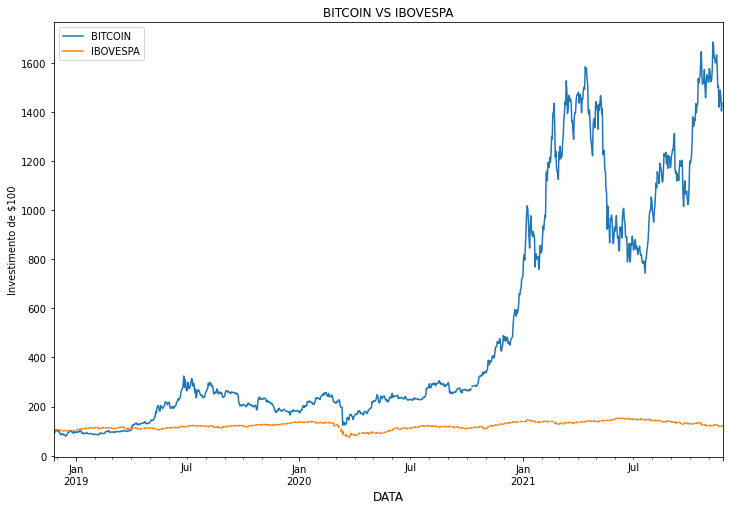

In [18]:
bitcoinRet = pd.DataFrame(bitcoinRet)
ibovRet = pd.DataFrame(ibovRet)

btcIbov = pd.concat([bitcoinRet, ibovRet], axis=1)
(100* btcIbov).plot(figsize=(12,8))
plt.title("BITCOIN VS IBOVESPA")
plt.xlabel("DATA", fontsize=12)
plt.ylabel("Investimento de $100")
plt.savefig("bctIbov.png", dpi=1000, transparent=True)

		Regressão Linear
Beta: 0.000036, Beta: -0.225431, R_Value: 0.885727, P_Value: 0.000000, stdErr: 0.000001


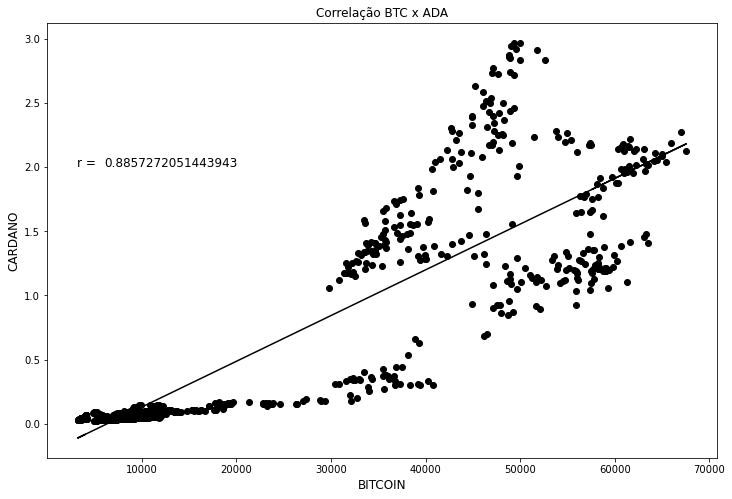

In [42]:
from scipy import stats as st
bitcoin = cryptoData["BITCOIN"]
cardano = cryptoData["CARDANO"]

beta, beta0, rValue, pValue, stdErr = st.linregress(bitcoin, cardano)
print("\t\tRegressão Linear")
print("Beta: {:.6f}, Beta: {:.6f}, R_Value: {:.6f}, P_Value: {:.6f}, stdErr: {:.6f}".format(beta, beta0, rValue, pValue, stdErr))

yLin = beta * bitcoin + beta0
plt.figure(figsize=(12,8))
plt.plot(bitcoin, yLin, '-k', bitcoin, cardano, 'ok')
plt.xlabel("BITCOIN", fontsize=12)
plt.ylabel("CARDANO", fontsize=12)
plt.title("Correlação BTC x ADA")
cor, pval = st.pearsonr(bitcoin, cardano)
plt.text(3200, 2, 'r = ', fontsize=12)
plt.text(6000, 2, str(cor), fontsize=12)
plt.savefig("Correlação.png", transparent=True, dpi=1000)